## Part B: Looking for convergence through 10 - 1000 iterations

We've added a for loop to the start of the code, iterating for 10, 100, 200, ... all the way up to 1000 times, in steps of 100. Then by just eyeballing the number of equipotential lines that fit inside a certain range on the plot, we can sort of tell kinda where convergence happens. It seems like a loose term that purely depends on the desired precision, so the convergence we find here is like "observable convergence", it has a low enough precision that we can tell that the precision doesn't go any further through iterations by looking at the plot, with no further numeric analysis.

In [ ]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
print("Initializing")
Nmax = 100
# Niter = 70
V = np.zeros((Nmax, Nmax), float)
Niters1 = 10
Niters2 = np.arange(100, 1001, 100)
Niters = np.append(Niters1, Niters2)  # Just to add the 10 in there!
print(Niters)

for n in Niters:
    Niter = n
    print (f"Working hard, wait for the figure while I count to {Niter-10}")
    V[:,0] = 100.0              # Line at 100V
    
    for iter in range(Niter):
        if iter%10 == 0: print(iter)
        for i in np.arange(1, Nmax-2):
            for j in np.arange(1,Nmax-2):
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    x = np.arange(0, Nmax-1, 2);  y = np.arange(0, 50, 2)
    X, Y = p.meshgrid(x,y)
    
    def functz(V):                                         # V(x, y)
        z = V[X,Y]
        return z
    
    Z = functz(V)
    fig = p.figure()                                      # Create figure
    ax = Axes3D(fig)                                      # Plot axes
    ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title(f"{Niter} Iterations")
    p.show()                                              # Show fig

This code outputs 11 figures, included in the folder "10-1000Iteration_plots" from a front view. We've aligned the top of the V line to the top of the plot at V = 100 to look at it head-on, parallel to the x-axis, then we simply counted the number of equipotential lines down to a certain point, like V = 60. So when the number of lines remains the same, we can say we've achieved "observable convergence".

    So from the top, down to V = 60:
- In the first figure with 10 iterations, no lines land in the range,
- In the second, with 100 iterations, there are 3 lines,
- In the third, with 200 iterations, there are 5 lines,
- In the fourth, with 300 iterations, there are 7 lines,
- In the fifth, with 400 iterations, there are 8 lines,
- In the sixth, with 500 iterations, there are 9 lines,
- In the seventh, with 600 iterations, there are 10 lines,
- In the eighth, with 700 iterations, there are also 10 lines,

so it happens within the 600-700 range, maaaybe within the 550-600 range. We will quantize this further in the Part C Extras section!



## Part C: The precision of the diagonals

#### To first get a feel for how this works, let's see what the difference is between the sum of the diagonals for 100 and 101 iterations:

In [1]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
Nmax = 100
Niter = 100
print(f"Initializing for {Niter} iterations:")
V = np.zeros((Nmax, Nmax), float)

V[:,0] = 100.0  # Line at 100V, dunno why they would do that with a loop

for iteration in range(Niter):
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    
V100 = V

diag100 = 0

for i in range(0, 100):
    diag100 += V100[i,i]
    
print(f"\nSum of the Diagonals: {diag100}")

Initializing for 100 iterations:

Sum of the Diagonals: 654.168113929732


In [2]:
Nmax = 100
Niter = 101
print(f"Initializing for {Niter} iterations:")
V = np.zeros((Nmax, Nmax), float)

V[:,0] = 100.0

for iteration in range(Niter):
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
            
    V101 = V
    
diag101 = 0

for i in range(0, 100):
    diag101 += V101[i,i]
    
print(f"\nSum of the Diagonals: {diag101}")

Initializing for 101 iterations:
Sum of the Diagonals: 656.9866952788607


In [4]:
diag101 - diag100

2.8185813491286353

Now since we have 100 values on the diagonals, dividing this number by 100 gives us an average on how ground we cover in an iteration, in the right direction.

In [5]:
print(f"The average 'error': {(diag101-diag100)/100}")

The average 'error': 0.028185813491286352


### Well we didn't _really fully_ understand what _exactly_ we are looking for in this part of the question, we've had a few ideas, so we did all of them!

### The first case is quite literal, we've iterated until the difference of the sums through an iteration was smaller than $10^{-3}$:

In [31]:
wanted_precision = 0.0001
Nmax = 100
V = np.zeros((Nmax, Nmax), float)
diags1 = 0
diags2 = 0

V[:,0] = 100.0

iteration = 0

while True:  # goes on forever until we break it
    diags1 = diags2
    diags2 = 0
    
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
            
    # Summing the diagonals now:        
    for n in range(0, Nmax):
        diags2 += V[n,n]
        
    precision = diags2 - diags1
    if precision < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
        print(f"Precision has reached {precision} on the {iteration} iteration.")
        break
        
    iteration += 1
    
    
    

Precision has reached 0.0009997032580031373 on the 7391 iteration.


#### Now that is A LOT of iterations, and a very high amount of precision, as the total difference for not one, not two, but 100 values is small enough to be in the $10^{-4}$ range. We _probably_ don't need it to be this high.

### Next, we divide the differences by 100, to get an average for the 100 different diagonal values we've summed:

In [17]:
wanted_precision = 0.0001
Nmax = 100
V = np.zeros((Nmax, Nmax), float)
diags1 = 0
diags2 = 0

V[:,0] = 100.0

iteration = 0

while True:  # goes on forever until we break it
    diags1 = diags2
    diags2 = 0
    
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
            
    # Summing the diagonals now:   
    for n in range(0, Nmax):
        diags2 += V[n,n]
        
    precision = diags2 - diags1
    if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
        print(f"The average precision has reached {precision/100} on the iteration {iteration}.")
        break
        
    iteration += 1
    
    
    

The average precision has reached 0.0009991434908442898 on the iteration 2912.


That seems much more reasonable, we can also look at these two different "precision" values as having a $10^2$ order of magnitude ratio, which shows us the nature of the iterations and precision. As expected, the more iterations we put in, the less and less precision we get out, it is an exponentially decaying relationship.

### Next, we can calculate the relative error between the two iterations with:

$$
    \epsilon_i = \frac{Current\,Iteration - Previous\,Iteration}{Current\,Iteration}
$$

In [16]:
wanted_precision = 0.0001
Nmax = 100
V = np.zeros((Nmax, Nmax), float)
diags1 = 0
diags2 = 0

V[:,0] = 100.0

iteration = 0

while True:  # goes on forever until we break it
    diags1 = diags2
    diags2 = 0
    
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
            
    # Summing the diagonals now:   
    for n in range(0, Nmax):
        diags2 += V[n,n]
        
    precision = (diags2 - diags1)/diags2
    if precision < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
        print(f"The relative precision has reached {precision} on the iteration {iteration}.")
        break
        
    iteration += 1
    
    
    

The relative precision has reached 0.0009987794890719739 on the iteration 460.


#### When we look at the relative error then, we get there in much fewer iterations, even fewer than what we've eyeballed in Part B.

## Part C Extras:

### Let's look back on Part B now, to see the precision of the convergence that we were able to deduce by eyeballing the plots. It has happened between 550-700 so let's just see the precision of the diagonal sums for 625 iterations, to get an idea. 

#### We are going to use the "average precision" where we've divided the diagonal sums by 100, it feels the most intuitive 8)

In [19]:
wanted_precision = 0.0001
Nmax = 100
V = np.zeros((Nmax, Nmax), float)
diags1 = 0
diags2 = 0

V[:,0] = 100.0

iteration = 0

while True:  # goes on forever until we break it
    diags1 = diags2
    diags2 = 0
    
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
            
    # Summing the diagonals now:   
    for n in range(0, Nmax):
        diags2 += V[n,n]
        
    precision = diags2 - diags1
    if iteration == 625:
        print(f"The average precision has reached {precision/100} on the {iteration}th iteration.")
        break
        
    iteration += 1
    
    
    

The average precision has reached 0.010757838249037376 on the 625th iteration.


#### Does this mean we were reeeally able to tell a difference of $10^{-2}$ precision by eyeballing? Not necessarily, but I still think this should raise our self esteem.

### We've learned on HW2 how important visualization is, so let's try graphing the needed iterations vs wanted precision:

In [37]:
wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001])
needed_iterations = np.empty(0)
precision_reached = np.empty(0)
    
for wanted_precision in wantable_precissions:
    
    Nmax = 100
    V = np.zeros((Nmax, Nmax), float)
    diags1 = 0
    diags2 = 0
    V[:,0] = 100.0

    iteration = 0

    while True:  # goes on forever until we break it
        diags1 = diags2
        diags2 = 0

        for i in np.arange(1, Nmax-2):
            for j in np.arange(1,Nmax-2):
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])

        # Summing the diagonals now:   
        for n in range(0, Nmax):
            diags2 += V[n,n]

        precision = diags2 - diags1
        if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
            print(f"The average precision has reached {precision/100} on iteration {iteration}.")
            needed_iterations = np.append(needed_iterations, iteration)
            precision_reached = np.append(precision_reached, precision/100)
            break

        iteration += 1

The average precision has reached 0.09868022498908374 on iteration 8.
The average precision has reached 0.08845398809045435 on iteration 10.
The average precision has reached 0.07773290298194865 on iteration 13.
The average precision has reached 0.0680801004229687 on iteration 17.
The average precision has reached 0.05991343364244187 on iteration 22.
The average precision has reached 0.04973708264924198 on iteration 32.
The average precision has reached 0.03982730918501829 on iteration 50.
The average precision has reached 0.029873803478539004 on iteration 89.
The average precision has reached 0.019988418615980663 on iteration 199.
The average precision has reached 0.009994940264241449 on iteration 693.


#### Let's turn these values into a series, with the precisions and iterations, and plot away:

In [38]:
import pandas as pd

iterations_for_precisions = pd.Series(precision_reached, needed_iterations)
iterations_for_precisions

8.0      0.098680
10.0     0.088454
13.0     0.077733
17.0     0.068080
22.0     0.059913
32.0     0.049737
50.0     0.039827
89.0     0.029874
199.0    0.019988
693.0    0.009995
dtype: float64

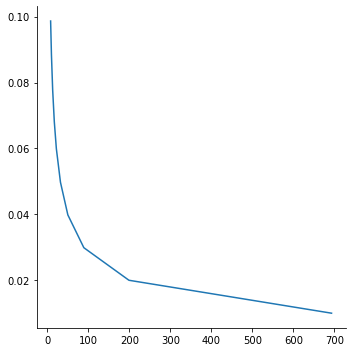

In [40]:
import seaborn as sns
sns.relplot(data=iterations_for_precisions, kind="line")

#### Well, we've tried fitting a curve onto this using the following code:

In [48]:
from scipy.optimize import minimize


def err_func(ma, xs, ys):
    err = 0
    m, a = ma
    for i in range(len(xs)):
        err += (ys[i] - m*a**xs[i])**2
    return err
        
        
x = needed_iterations
y = precision_reached

print(minimize(err_func, [1, 1], args=(x, y)),'\n\n')

      fun: 0.03678125470508319
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 0., -0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([ 0.96707923, -0.00946333]) 




#### Unfortunately, we couldn't get to the desired values with this function, the x values are simply too large for the y values! It seems like it will take more trial and error before we find the fit, but we've included this first take on here. :)

So moving on to Part D!

## Part D: Varying the delta values

### First we have to modify the equation in the code, to include the $\frac{1}{(\Delta x)^2}$ and $\frac{1}{(\Delta y)^2}$ values. For this we go back to the center approximation for the second derivatives:

$$
    \frac{\partial^2U(x,y)}{\partial x^2} \approx \frac{U(x + \Delta x, y) + U(x - \Delta x,y) - 2U(x,y)}{(\Delta x)^2}
$$

$$
    \frac{\partial^2U(x,y)}{\partial y^2} \approx \frac{U(x, y+\Delta y) + U(x, y -\Delta y) - 2U(x,y)}{(\Delta y)^2}
$$

$$
\frac{U(x + \Delta x, y) + U(x - \Delta x,y) - 2U(x,y)}{(\Delta x)^2}+  \frac{U(x, y+\Delta y) + U(x, y -\Delta y) - 2U(x,y)}{(\Delta y)^2}= 0
$$

$$
U(x,y) = \frac{\Delta x^2\Delta y^2}{2(\Delta x^2 + \Delta y^2)}\left[\frac{U(x+\Delta x, y) +U(x-\Delta x, y)}{(\Delta x)^2}+\frac{U(x, y + \Delta y) + U(x, y - \Delta y)}{(\Delta y)^2}\right]
$$

#### Let's put this into the code, and see if we get the familiar plots for the $\Delta = 1$ values:

Initializing
Working hard, wait for the figure while I count to 90


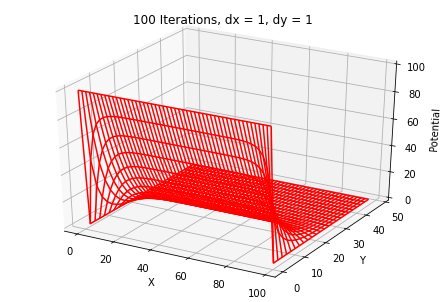

In [50]:
print("Initializing")
Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax), float)
deltax = 1
deltay = 1
dx2 = deltax**2
dy2 = deltay**2

print (f"Working hard, wait for the figure while I count to {Niter-10}")
V[:,0] = 100.0              # Line at 100V

for iteration in range(Niter):
#     if iteration%10 == 0: print(iteration)
    for i in np.arange(1, Nmax-deltax-1):
        for j in np.arange(1,Nmax-deltay-1):
            V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)
x = np.arange(0, Nmax-1, 2);  y = np.arange(0, 50, 2)
X, Y = p.meshgrid(x,y)

def functz(V):                                         # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V)
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
p.show()                                              # Show fig

#### Looks like it works, let's get to work!

## Important note:

#### On line 18 of the code, `x = np.arange(0, Nmax-1, 2);  y = np.arange(0, 50, 2)` the step size while creating the x and y values to plot the data, is taken as 2. We have changed this to be 1 for both x and y, so we don't get peaked values for $\Delta = 2$

##### In this first part, we didn't adjust the plot parameters accordingly with the $\Delta$ values, we simply kept them at 1 so we could discuss the  non-continousness of the calculations and plots.

## There are a few things to talk about here, let's tackle them one at a time:

### First we vary $\Delta x$ and $\Delta y$ together, keeping them equal, and keep the x y value step size at 1:

(all the plots from side views were included in the folder "PartD_Plots")

### $$\Delta x = \Delta y = [1,\, 2,\, 3]$$

Initializing


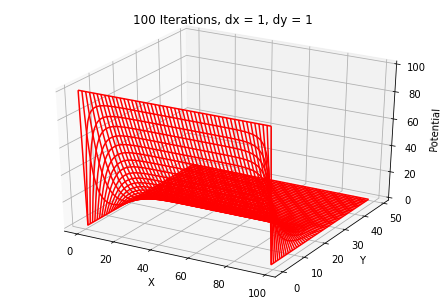

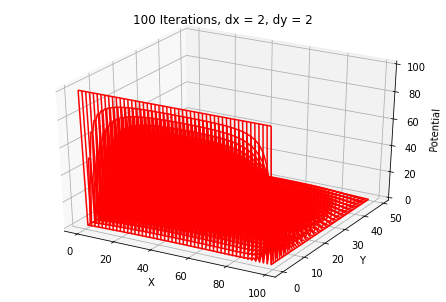

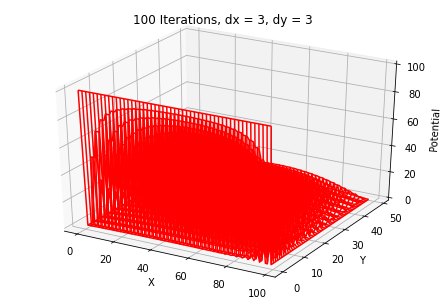

In [39]:
print("Initializing")
Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax), float)
for d in [1,2,3]:
    deltax = deltay = d
    dx2 = deltax**2
    dy2 = deltay**2

#     print (f"Working hard, wait for the figure while I count to {Niter-10}")
    V[:,0] = 100.0              # Line at 100V

    for iteration in range(Niter):
#         if iteration%10 == 0: print(iteration)
        for i in np.arange(1, Nmax-deltax-1):
            for j in np.arange(1,Nmax-deltay-1):
                V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)
    x = np.arange(0, Nmax-1, 1);  y = np.arange(0, 50, 1)
    X, Y = p.meshgrid(x,y)

    def functz(V):                                         # V(x, y)
        z = V[X,Y]
        return z

    Z = functz(V)
    fig = p.figure()                                      # Create figure
    ax = Axes3D(fig)                                      # Plot axes
    ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
    p.show()                                              # Show fig

##### By plotting to get these peaks, we can see the values we skip over by varying the $\Delta$'s. We have modified the code here to print out every value of `V[i,j]` that is calculated to be 0, and the two according $+\Delta y, -\Delta y$ values:

Initializing

V[1,1]=0.0
V[1,3] = 0.0
V[1,-1] = 0.0

V[1,3]=0.0
V[1,5] = 0.0
V[1,1] = 0.0

V[1,5]=0.0
V[1,7] = 0.0
V[1,3] = 0.0

V[1,7]=0.0
V[1,9] = 0.0
V[1,5] = 0.0

V[1,9]=0.0
V[1,11] = 0.0
V[1,7] = 0.0

V[1,11]=0.0
V[1,13] = 0.0
V[1,9] = 0.0

V[1,13]=0.0
V[1,15] = 0.0
V[1,11] = 0.0

V[1,15]=0.0
V[1,17] = 0.0
V[1,13] = 0.0

V[1,17]=0.0
V[1,19] = 0.0
V[1,15] = 0.0

V[1,19]=0.0
V[1,21] = 0.0
V[1,17] = 0.0

V[1,21]=0.0
V[1,23] = 0.0
V[1,19] = 0.0

V[1,23]=0.0
V[1,25] = 0.0
V[1,21] = 0.0

V[1,25]=0.0
V[1,27] = 0.0
V[1,23] = 0.0

V[1,27]=0.0
V[1,29] = 0.0
V[1,25] = 0.0

V[1,29]=0.0
V[1,31] = 0.0
V[1,27] = 0.0

V[1,31]=0.0
V[1,33] = 0.0
V[1,29] = 0.0

V[1,33]=0.0
V[1,35] = 0.0
V[1,31] = 0.0

V[1,35]=0.0
V[1,37] = 0.0
V[1,33] = 0.0

V[1,37]=0.0
V[1,39] = 0.0
V[1,35] = 0.0

V[1,39]=0.0
V[1,41] = 0.0
V[1,37] = 0.0

V[1,41]=0.0
V[1,43] = 0.0
V[1,39] = 0.0

V[1,43]=0.0
V[1,45] = 0.0
V[1,41] = 0.0

V[1,45]=0.0
V[1,47] = 0.0
V[1,43] = 0.0

V[1,47]=0.0
V[1,49] = 0.0
V[1,45] = 0.0

V[1,49]=0.0
V[1,

V[28,89] = 0.0
V[28,85] = 0.0

V[28,89]=0.0
V[28,91] = 0.0
V[28,87] = 0.0

V[28,91]=0.0
V[28,93] = 0.0
V[28,89] = 0.0

V[28,93]=0.0
V[28,95] = 0.0
V[28,91] = 0.0

V[28,95]=0.0
V[28,97] = 0.0
V[28,93] = 0.0

V[29,1]=0.0
V[29,3] = 0.0
V[29,-1] = 0.0

V[29,3]=0.0
V[29,5] = 0.0
V[29,1] = 0.0

V[29,5]=0.0
V[29,7] = 0.0
V[29,3] = 0.0

V[29,7]=0.0
V[29,9] = 0.0
V[29,5] = 0.0

V[29,9]=0.0
V[29,11] = 0.0
V[29,7] = 0.0

V[29,11]=0.0
V[29,13] = 0.0
V[29,9] = 0.0

V[29,13]=0.0
V[29,15] = 0.0
V[29,11] = 0.0

V[29,15]=0.0
V[29,17] = 0.0
V[29,13] = 0.0

V[29,17]=0.0
V[29,19] = 0.0
V[29,15] = 0.0

V[29,19]=0.0
V[29,21] = 0.0
V[29,17] = 0.0

V[29,21]=0.0
V[29,23] = 0.0
V[29,19] = 0.0

V[29,23]=0.0
V[29,25] = 0.0
V[29,21] = 0.0

V[29,25]=0.0
V[29,27] = 0.0
V[29,23] = 0.0

V[29,27]=0.0
V[29,29] = 0.0
V[29,25] = 0.0

V[29,29]=0.0
V[29,31] = 0.0
V[29,27] = 0.0

V[29,31]=0.0
V[29,33] = 0.0
V[29,29] = 0.0

V[29,33]=0.0
V[29,35] = 0.0
V[29,31] = 0.0

V[29,35]=0.0
V[29,37] = 0.0
V[29,33] = 0.0

V[29,37]=0.0
V[

V[58,25] = 0.0
V[58,21] = 0.0

V[58,25]=0.0
V[58,27] = 0.0
V[58,23] = 0.0

V[58,27]=0.0
V[58,29] = 0.0
V[58,25] = 0.0

V[58,29]=0.0
V[58,31] = 0.0
V[58,27] = 0.0

V[58,31]=0.0
V[58,33] = 0.0
V[58,29] = 0.0

V[58,33]=0.0
V[58,35] = 0.0
V[58,31] = 0.0

V[58,35]=0.0
V[58,37] = 0.0
V[58,33] = 0.0

V[58,37]=0.0
V[58,39] = 0.0
V[58,35] = 0.0

V[58,39]=0.0
V[58,41] = 0.0
V[58,37] = 0.0

V[58,41]=0.0
V[58,43] = 0.0
V[58,39] = 0.0

V[58,43]=0.0
V[58,45] = 0.0
V[58,41] = 0.0

V[58,45]=0.0
V[58,47] = 0.0
V[58,43] = 0.0

V[58,47]=0.0
V[58,49] = 0.0
V[58,45] = 0.0

V[58,49]=0.0
V[58,51] = 0.0
V[58,47] = 0.0

V[58,51]=0.0
V[58,53] = 0.0
V[58,49] = 0.0

V[58,53]=0.0
V[58,55] = 0.0
V[58,51] = 0.0

V[58,55]=0.0
V[58,57] = 0.0
V[58,53] = 0.0

V[58,57]=0.0
V[58,59] = 0.0
V[58,55] = 0.0

V[58,59]=0.0
V[58,61] = 0.0
V[58,57] = 0.0

V[58,61]=0.0
V[58,63] = 0.0
V[58,59] = 0.0

V[58,63]=0.0
V[58,65] = 0.0
V[58,61] = 0.0

V[58,65]=0.0
V[58,67] = 0.0
V[58,63] = 0.0

V[58,67]=0.0
V[58,69] = 0.0
V[58,65] = 0.0

V

V[86,67] = 0.0
V[86,63] = 0.0

V[86,67]=0.0
V[86,69] = 0.0
V[86,65] = 0.0

V[86,69]=0.0
V[86,71] = 0.0
V[86,67] = 0.0

V[86,71]=0.0
V[86,73] = 0.0
V[86,69] = 0.0

V[86,73]=0.0
V[86,75] = 0.0
V[86,71] = 0.0

V[86,75]=0.0
V[86,77] = 0.0
V[86,73] = 0.0

V[86,77]=0.0
V[86,79] = 0.0
V[86,75] = 0.0

V[86,79]=0.0
V[86,81] = 0.0
V[86,77] = 0.0

V[86,81]=0.0
V[86,83] = 0.0
V[86,79] = 0.0

V[86,83]=0.0
V[86,85] = 0.0
V[86,81] = 0.0

V[86,85]=0.0
V[86,87] = 0.0
V[86,83] = 0.0

V[86,87]=0.0
V[86,89] = 0.0
V[86,85] = 0.0

V[86,89]=0.0
V[86,91] = 0.0
V[86,87] = 0.0

V[86,91]=0.0
V[86,93] = 0.0
V[86,89] = 0.0

V[86,93]=0.0
V[86,95] = 0.0
V[86,91] = 0.0

V[86,95]=0.0
V[86,97] = 0.0
V[86,93] = 0.0

V[87,1]=0.0
V[87,3] = 0.0
V[87,-1] = 0.0

V[87,3]=0.0
V[87,5] = 0.0
V[87,1] = 0.0

V[87,5]=0.0
V[87,7] = 0.0
V[87,3] = 0.0

V[87,7]=0.0
V[87,9] = 0.0
V[87,5] = 0.0

V[87,9]=0.0
V[87,11] = 0.0
V[87,7] = 0.0

V[87,11]=0.0
V[87,13] = 0.0
V[87,9] = 0.0

V[87,13]=0.0
V[87,15] = 0.0
V[87,11] = 0.0

V[87,15]=0.0
V[

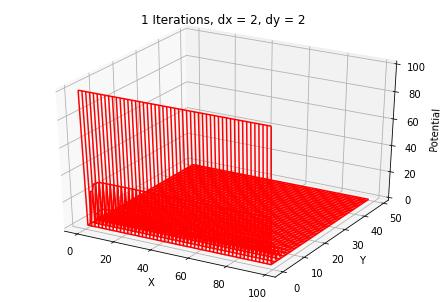

In [38]:
print("Initializing")
Nmax = 100
Niter = 1
V = np.zeros((Nmax, Nmax), float)
deltax = 2
deltay = 2
dx2 = deltax**2
dy2 = deltay**2

# print (f"Working hard, wait for the figure while I count to {Niter-10}")
V[:,0] = 100.0              # Line at 100V

for iteration in range(Niter):
#     if iteration%10 == 0: print(iteration)
    for i in np.arange(1, Nmax-deltax-1):
        for j in np.arange(1,Nmax-deltay-1):
            V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)
            if V[i,j] == 0:
                print(f"\nV[{i},{j}]={V[i,j]}")
                print(f"V[{i},{j+deltay}] = {V[i, j+deltay]}")
                print(f"V[{i},{j-deltay}] = {V[i, j-deltay]}")
x = np.arange(0, Nmax-1, 1);  y = np.arange(0, 50, 1)
X, Y = p.meshgrid(x,y)

def functz(V):                                         # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V)
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
p.show()                                              # Show fig

Initializing

V[1,1]=0.0
V[1,4] = 0.0
V[1,-2] = 0.0

V[1,2]=0.0
V[1,5] = 0.0
V[1,-1] = 0.0

V[1,4]=0.0
V[1,7] = 0.0
V[1,1] = 0.0

V[1,5]=0.0
V[1,8] = 0.0
V[1,2] = 0.0

V[1,7]=0.0
V[1,10] = 0.0
V[1,4] = 0.0

V[1,8]=0.0
V[1,11] = 0.0
V[1,5] = 0.0

V[1,10]=0.0
V[1,13] = 0.0
V[1,7] = 0.0

V[1,11]=0.0
V[1,14] = 0.0
V[1,8] = 0.0

V[1,13]=0.0
V[1,16] = 0.0
V[1,10] = 0.0

V[1,14]=0.0
V[1,17] = 0.0
V[1,11] = 0.0

V[1,16]=0.0
V[1,19] = 0.0
V[1,13] = 0.0

V[1,17]=0.0
V[1,20] = 0.0
V[1,14] = 0.0

V[1,19]=0.0
V[1,22] = 0.0
V[1,16] = 0.0

V[1,20]=0.0
V[1,23] = 0.0
V[1,17] = 0.0

V[1,22]=0.0
V[1,25] = 0.0
V[1,19] = 0.0

V[1,23]=0.0
V[1,26] = 0.0
V[1,20] = 0.0

V[1,25]=0.0
V[1,28] = 0.0
V[1,22] = 0.0

V[1,26]=0.0
V[1,29] = 0.0
V[1,23] = 0.0

V[1,28]=0.0
V[1,31] = 0.0
V[1,25] = 0.0

V[1,29]=0.0
V[1,32] = 0.0
V[1,26] = 0.0

V[1,31]=0.0
V[1,34] = 0.0
V[1,28] = 0.0

V[1,32]=0.0
V[1,35] = 0.0
V[1,29] = 0.0

V[1,34]=0.0
V[1,37] = 0.0
V[1,31] = 0.0

V[1,35]=0.0
V[1,38] = 0.0
V[1,32] = 0.0

V[1,37]=0.0
V[1,40

V[20,82] = 0.0
V[20,76] = 0.0

V[20,80]=0.0
V[20,83] = 0.0
V[20,77] = 0.0

V[20,82]=0.0
V[20,85] = 0.0
V[20,79] = 0.0

V[20,83]=0.0
V[20,86] = 0.0
V[20,80] = 0.0

V[20,85]=0.0
V[20,88] = 0.0
V[20,82] = 0.0

V[20,86]=0.0
V[20,89] = 0.0
V[20,83] = 0.0

V[20,88]=0.0
V[20,91] = 0.0
V[20,85] = 0.0

V[20,89]=0.0
V[20,92] = 0.0
V[20,86] = 0.0

V[20,91]=0.0
V[20,94] = 0.0
V[20,88] = 0.0

V[20,92]=0.0
V[20,95] = 0.0
V[20,89] = 0.0

V[20,94]=0.0
V[20,97] = 0.0
V[20,91] = 0.0

V[20,95]=0.0
V[20,98] = 0.0
V[20,92] = 0.0

V[21,1]=0.0
V[21,4] = 0.0
V[21,-2] = 0.0

V[21,2]=0.0
V[21,5] = 0.0
V[21,-1] = 0.0

V[21,4]=0.0
V[21,7] = 0.0
V[21,1] = 0.0

V[21,5]=0.0
V[21,8] = 0.0
V[21,2] = 0.0

V[21,7]=0.0
V[21,10] = 0.0
V[21,4] = 0.0

V[21,8]=0.0
V[21,11] = 0.0
V[21,5] = 0.0

V[21,10]=0.0
V[21,13] = 0.0
V[21,7] = 0.0

V[21,11]=0.0
V[21,14] = 0.0
V[21,8] = 0.0

V[21,13]=0.0
V[21,16] = 0.0
V[21,10] = 0.0

V[21,14]=0.0
V[21,17] = 0.0
V[21,11] = 0.0

V[21,16]=0.0
V[21,19] = 0.0
V[21,13] = 0.0

V[21,17]=0.0
V[21

V[39,86]=0.0
V[39,89] = 0.0
V[39,83] = 0.0

V[39,88]=0.0
V[39,91] = 0.0
V[39,85] = 0.0

V[39,89]=0.0
V[39,92] = 0.0
V[39,86] = 0.0

V[39,91]=0.0
V[39,94] = 0.0
V[39,88] = 0.0

V[39,92]=0.0
V[39,95] = 0.0
V[39,89] = 0.0

V[39,94]=0.0
V[39,97] = 0.0
V[39,91] = 0.0

V[39,95]=0.0
V[39,98] = 0.0
V[39,92] = 0.0

V[40,1]=0.0
V[40,4] = 0.0
V[40,-2] = 0.0

V[40,2]=0.0
V[40,5] = 0.0
V[40,-1] = 0.0

V[40,4]=0.0
V[40,7] = 0.0
V[40,1] = 0.0

V[40,5]=0.0
V[40,8] = 0.0
V[40,2] = 0.0

V[40,7]=0.0
V[40,10] = 0.0
V[40,4] = 0.0

V[40,8]=0.0
V[40,11] = 0.0
V[40,5] = 0.0

V[40,10]=0.0
V[40,13] = 0.0
V[40,7] = 0.0

V[40,11]=0.0
V[40,14] = 0.0
V[40,8] = 0.0

V[40,13]=0.0
V[40,16] = 0.0
V[40,10] = 0.0

V[40,14]=0.0
V[40,17] = 0.0
V[40,11] = 0.0

V[40,16]=0.0
V[40,19] = 0.0
V[40,13] = 0.0

V[40,17]=0.0
V[40,20] = 0.0
V[40,14] = 0.0

V[40,19]=0.0
V[40,22] = 0.0
V[40,16] = 0.0

V[40,20]=0.0
V[40,23] = 0.0
V[40,17] = 0.0

V[40,22]=0.0
V[40,25] = 0.0
V[40,19] = 0.0

V[40,23]=0.0
V[40,26] = 0.0
V[40,20] = 0.0

V[40


V[53,34]=0.0
V[53,37] = 0.0
V[53,31] = 0.0

V[53,35]=0.0
V[53,38] = 0.0
V[53,32] = 0.0

V[53,37]=0.0
V[53,40] = 0.0
V[53,34] = 0.0

V[53,38]=0.0
V[53,41] = 0.0
V[53,35] = 0.0

V[53,40]=0.0
V[53,43] = 0.0
V[53,37] = 0.0

V[53,41]=0.0
V[53,44] = 0.0
V[53,38] = 0.0

V[53,43]=0.0
V[53,46] = 0.0
V[53,40] = 0.0

V[53,44]=0.0
V[53,47] = 0.0
V[53,41] = 0.0

V[53,46]=0.0
V[53,49] = 0.0
V[53,43] = 0.0

V[53,47]=0.0
V[53,50] = 0.0
V[53,44] = 0.0

V[53,49]=0.0
V[53,52] = 0.0
V[53,46] = 0.0

V[53,50]=0.0
V[53,53] = 0.0
V[53,47] = 0.0

V[53,52]=0.0
V[53,55] = 0.0
V[53,49] = 0.0

V[53,53]=0.0
V[53,56] = 0.0
V[53,50] = 0.0

V[53,55]=0.0
V[53,58] = 0.0
V[53,52] = 0.0

V[53,56]=0.0
V[53,59] = 0.0
V[53,53] = 0.0

V[53,58]=0.0
V[53,61] = 0.0
V[53,55] = 0.0

V[53,59]=0.0
V[53,62] = 0.0
V[53,56] = 0.0

V[53,61]=0.0
V[53,64] = 0.0
V[53,58] = 0.0

V[53,62]=0.0
V[53,65] = 0.0
V[53,59] = 0.0

V[53,64]=0.0
V[53,67] = 0.0
V[53,61] = 0.0

V[53,65]=0.0
V[53,68] = 0.0
V[53,62] = 0.0

V[53,67]=0.0
V[53,70] = 0.0
V[5


V[71,61]=0.0
V[71,64] = 0.0
V[71,58] = 0.0

V[71,62]=0.0
V[71,65] = 0.0
V[71,59] = 0.0

V[71,64]=0.0
V[71,67] = 0.0
V[71,61] = 0.0

V[71,65]=0.0
V[71,68] = 0.0
V[71,62] = 0.0

V[71,67]=0.0
V[71,70] = 0.0
V[71,64] = 0.0

V[71,68]=0.0
V[71,71] = 0.0
V[71,65] = 0.0

V[71,70]=0.0
V[71,73] = 0.0
V[71,67] = 0.0

V[71,71]=0.0
V[71,74] = 0.0
V[71,68] = 0.0

V[71,73]=0.0
V[71,76] = 0.0
V[71,70] = 0.0

V[71,74]=0.0
V[71,77] = 0.0
V[71,71] = 0.0

V[71,76]=0.0
V[71,79] = 0.0
V[71,73] = 0.0

V[71,77]=0.0
V[71,80] = 0.0
V[71,74] = 0.0

V[71,79]=0.0
V[71,82] = 0.0
V[71,76] = 0.0

V[71,80]=0.0
V[71,83] = 0.0
V[71,77] = 0.0

V[71,82]=0.0
V[71,85] = 0.0
V[71,79] = 0.0

V[71,83]=0.0
V[71,86] = 0.0
V[71,80] = 0.0

V[71,85]=0.0
V[71,88] = 0.0
V[71,82] = 0.0

V[71,86]=0.0
V[71,89] = 0.0
V[71,83] = 0.0

V[71,88]=0.0
V[71,91] = 0.0
V[71,85] = 0.0

V[71,89]=0.0
V[71,92] = 0.0
V[71,86] = 0.0

V[71,91]=0.0
V[71,94] = 0.0
V[71,88] = 0.0

V[71,92]=0.0
V[71,95] = 0.0
V[71,89] = 0.0

V[71,94]=0.0
V[71,97] = 0.0
V[7

V[92,8] = 0.0

V[92,13]=0.0
V[92,16] = 0.0
V[92,10] = 0.0

V[92,14]=0.0
V[92,17] = 0.0
V[92,11] = 0.0

V[92,16]=0.0
V[92,19] = 0.0
V[92,13] = 0.0

V[92,17]=0.0
V[92,20] = 0.0
V[92,14] = 0.0

V[92,19]=0.0
V[92,22] = 0.0
V[92,16] = 0.0

V[92,20]=0.0
V[92,23] = 0.0
V[92,17] = 0.0

V[92,22]=0.0
V[92,25] = 0.0
V[92,19] = 0.0

V[92,23]=0.0
V[92,26] = 0.0
V[92,20] = 0.0

V[92,25]=0.0
V[92,28] = 0.0
V[92,22] = 0.0

V[92,26]=0.0
V[92,29] = 0.0
V[92,23] = 0.0

V[92,28]=0.0
V[92,31] = 0.0
V[92,25] = 0.0

V[92,29]=0.0
V[92,32] = 0.0
V[92,26] = 0.0

V[92,31]=0.0
V[92,34] = 0.0
V[92,28] = 0.0

V[92,32]=0.0
V[92,35] = 0.0
V[92,29] = 0.0

V[92,34]=0.0
V[92,37] = 0.0
V[92,31] = 0.0

V[92,35]=0.0
V[92,38] = 0.0
V[92,32] = 0.0

V[92,37]=0.0
V[92,40] = 0.0
V[92,34] = 0.0

V[92,38]=0.0
V[92,41] = 0.0
V[92,35] = 0.0

V[92,40]=0.0
V[92,43] = 0.0
V[92,37] = 0.0

V[92,41]=0.0
V[92,44] = 0.0
V[92,38] = 0.0

V[92,43]=0.0
V[92,46] = 0.0
V[92,40] = 0.0

V[92,44]=0.0
V[92,47] = 0.0
V[92,41] = 0.0

V[92,46]=0.0
V[92

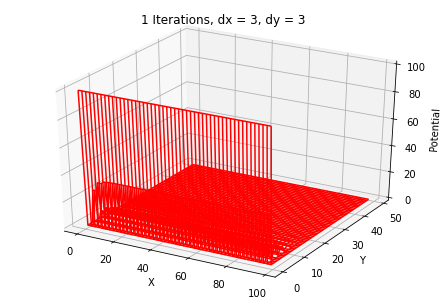

In [37]:
print("Initializing")
Nmax = 100
Niter = 1
V = np.zeros((Nmax, Nmax), float)
deltax = 3
deltay = 3
dx2 = deltax**2
dy2 = deltay**2

# print (f"Working hard, wait for the figure while I count to {Niter-10}")
V[:,0] = 100.0              # Line at 100V

for iteration in range(Niter):
#     if iteration%10 == 0: print(iteration)
    for i in np.arange(1, Nmax-deltax-1):
        for j in np.arange(1,Nmax-deltay-1):
            V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)
            if V[i,j] == 0:
                print(f"\nV[{i},{j}]={V[i,j]}")
                print(f"V[{i},{j+deltay}] = {V[i, j+deltay]}")
                print(f"V[{i},{j-deltay}] = {V[i, j-deltay]}")
x = np.arange(0, Nmax-1, 1);  y = np.arange(0, 50, 1)
X, Y = p.meshgrid(x,y)

def functz(V):                                         # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V)
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
p.show()                                              # Show fig

##### Looking at the outputs, we see that, as expected, the $\Delta = 2$ case skips over one of every two values, and the $\Delta = 3$ case skips over two of every three values. The original $\Delta = 1$ case accounts for every integer, so nothing goes to waste so to say!

##### The second effect we can observe by looking at the peaks is how many we have. For $\Delta = 2$, clearly we divide the 50 integers into steps of two, giving us 25 "measured" values. For $\Delta = 3$, we divide by 3, giving 16 peaks, so the larger our $\Delta$, the less data we fit into our range.

## Next, we plot these up 'properly', to observe the other effects of varying $\Delta$:

To do this, we change the plot step sizes to be equal to our $\Delta$'s. (Plots are included in the folder again.)

### $$\Delta x = \Delta y = [3,\, 5,\, 7]$$

Initializing


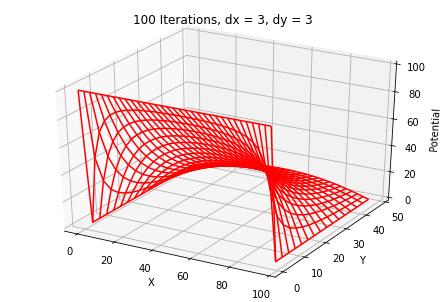

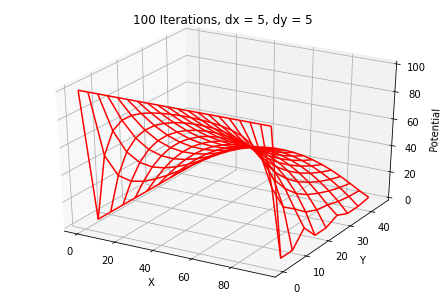

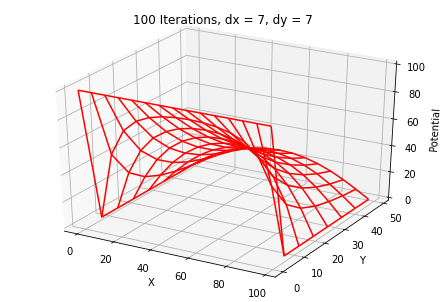

In [47]:
print("Initializing")
Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax), float)
for d in [3,5,7]:
    deltax=deltay=d
    dx2 = deltax**2
    dy2 = deltay**2

    # print (f"Working hard, wait for the figure while I count to {Niter-10}")
    V[:,0] = 100.0              # Line at 100V

    for iteration in range(Niter):
    #     if iteration%10 == 0: print(iteration)
        for i in np.arange(1, Nmax-deltax-1):
            for j in np.arange(1,Nmax-deltay-1):
                V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)

    x = np.arange(0, Nmax-1, deltax);  y = np.arange(0, 50, deltay)
    X, Y = p.meshgrid(x,y)

    def functz(V):                                         # V(x, y)
        z = V[X,Y]
        return z

    Z = functz(V)
    fig = p.figure()                                      # Create figure
    ax = Axes3D(fig)                                      # Plot axes
    ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
    p.show()                                              # Show fig

##### We can see here our mesh starts to look pretty sorry, from the side views however (included in the folder for Part D) we see that the V values increase as $\Delta$  increases.

To see why this happens, we can refer back to our equation for $U(x,y)$:

$$
U(x,y) = \frac{\Delta x^2\Delta y^2}{2(\Delta x^2 + \Delta y^2)}\left[\frac{U(x+\Delta x, y) +U(x-\Delta x, y)}{(\Delta x)^2}+\frac{U(x, y + \Delta y) + U(x, y - \Delta y)}{(\Delta y)^2}\right]
$$

For this special case, let's plug in $\Delta x = \Delta y = \Delta$

$$
U(x,y) = \frac{\Delta^4}{4\Delta^2}\left[\frac{U(x+\Delta, y) +U(x-\Delta, y)+U(x, y + \Delta) + U(x, y - \Delta)}{(\Delta)^2}\right]
$$

$$
    = \frac{1}{4}\left[U(x+\Delta, y) +U(x-\Delta, y)+U(x, y + \Delta) + U(x, y - \Delta)\right]
$$

We come to the conclusion that when the two $\Delta$ values are equal, the coefficient is always $\frac{1}{4}$, so the values we find purely depend on the $U(x,y)$ values.

#### So then the reason why the values increase as $\Delta$ increases must be because of the $U(x-\Delta,y)$ and $U(x, y-\Delta)$ elements. The smaller the $x$ and $y$ we have for $U(x,y)$, the closer we are to the voltage, therefore the larger the $U(x,y)$ value we get. So when we calculate $U(x-\Delta,y)$ and $U(x, y-\Delta)$ with _a larger value of_ $\Delta$, we will always go closer to the voltage and get a larger value to add to the according $U(x,y)$.

### Finally, let's nest the $\Delta$ loops to get different values for $\Delta x$ and $\Delta y$:

Initializing


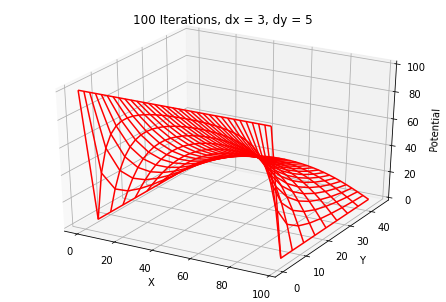

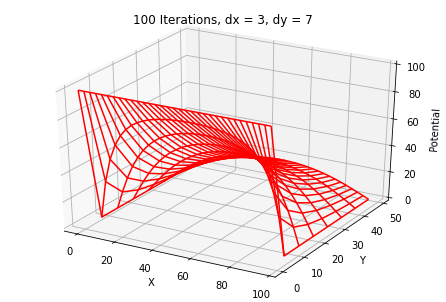

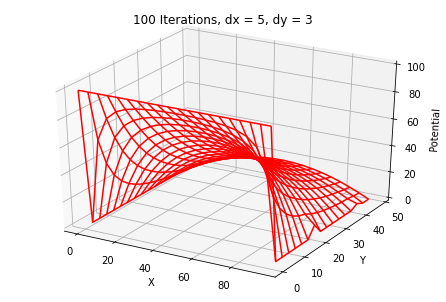

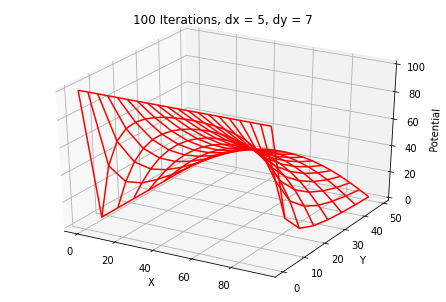

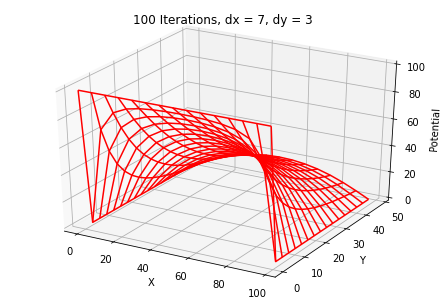

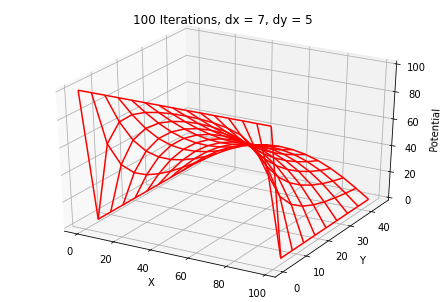

In [49]:
print("Initializing")
Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax), float)
for deltax in [3,5,7]:
    for deltay in [3,5,7]:
        if deltay == deltax:
            continue  # so we skip the equals
        dx2 = deltax**2
        dy2 = deltay**2

        # print (f"Working hard, wait for the figure while I count to {Niter-10}")
        V[:,0] = 100.0              # Line at 100V

        for iteration in range(Niter):
        #     if iteration%10 == 0: print(iteration)
            for i in np.arange(1, Nmax-deltax-1):
                for j in np.arange(1,Nmax-deltay-1):
                    V[i,j] = (dx2*dy2)/(2*(dx2+dy2))*((V[i+deltax,j]+V[i-deltax,j])/dx2+(V[i,j+deltay]+V[i,j-deltay])/dy2)

        x = np.arange(0, Nmax-1, deltax);  y = np.arange(0, 50, deltay)
        X, Y = p.meshgrid(x,y)

        def functz(V):                                         # V(x, y)
            z = V[X,Y]
            return z

        Z = functz(V)
        fig = p.figure()                                      # Create figure
        ax = Axes3D(fig)                                      # Plot axes
        ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Potential')
        ax.set_title(f"{Niter} Iterations, dx = {deltax}, dy = {deltay}")
        p.show()                                              # Show fig

#### Well honestly, other than the x and y values getting accordingly "clunky", there doesn't seem to be a lot to talk about here.  The values remain the same for same $\Delta$ values for their respective coordinates, and the number of "known values" decrease as $\Delta$ increases, making the mesh look more dense for the coordinate with the lower $\Delta$.

#### These plots are basically like the "superpositions" of what we have seen so far, like the superposition of two lower and higher frequency normal modes 8)!

# Part E: Gauss-Seidel vs Jacobi Relaxations showdown

All the code so far has been using the Gauss-Seidel method, since it changes the respective `V[i,j]` component on every step, then uses the new values to calculate the other values. To turn it into a Jacobi relaxation, we need to keep two different matrices at all times, mainly the matrix we get as an output from the previous iteration, then we need to use that matrix, without altering any of its values, to find the new matrix. So each iteration will use values that have been found in the previous iteration to find the next matrix.

We will call these matrices V1 and V2, the V2 matrix will be the latter one, the one we calculate from the constant V1 values from the previous iteration. Then we will change V1 to be equal to V2, so it is updated to the values from the latest iteration. Let's see how it works:

Initializing
Working hard, wait for the figure while I count to 90
0
10
20
30
40
50
60
70
80
90


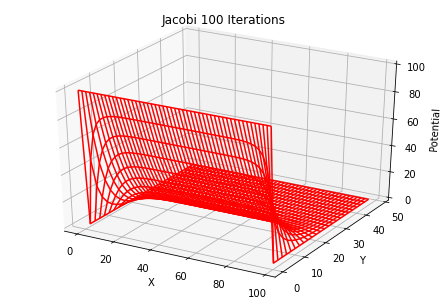

In [13]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
print("Initializing")
Nmax = 100
Niter = 100
V1 = np.zeros((Nmax, Nmax), float)
V2 = np.zeros((Nmax, Nmax), float)

print (f"Working hard, wait for the figure while I count to {Niter-10}")
V1[:,0] = 100.0              # Line at 100V
V2[:,0] = 100.0

for iter in range(Niter):
    if iter%10 == 0: print(iter)
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V2[i,j] = 0.25*(V1[i+1,j]+V1[i-1,j]+V1[i,j+1]+V1[i,j-1])
            
    V1 = V2
            
x = np.arange(0, Nmax-1, 2);  y = np.arange(0, 50, 2)
X, Y = p.meshgrid(x,y)

def functz(V):                                         # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V2)
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title(f"Jacobi {Niter} Iterations")
p.show()                                              # Show fig

And the original code:

Initializing
Working hard, wait for the figure while I count to 90
0
10
20
30
40
50
60
70
80
90


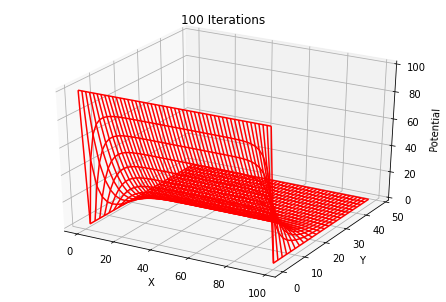

In [15]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
print("Initializing")
Nmax = 100
Niter = 100
V = np.zeros((Nmax, Nmax), float)

print (f"Working hard, wait for the figure while I count to {Niter-10}")
V[:,0] = 100.0              # Line at 100V

for iter in range(Niter):
    if iter%10 == 0: print(iter)
    for i in np.arange(1, Nmax-2):
        for j in np.arange(1,Nmax-2):
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                           
x = np.arange(0, Nmax-1, 2);  y = np.arange(0, 50, 2)
X, Y = p.meshgrid(x,y)

def functz(V):                                         # V(x, y)
    z = V[X,Y]
    return z

Z = functz(V)
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color='r')               # Red wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title(f"{Niter} Iterations")
p.show()                                              # Show fig

Just eyeballing the output plots (which we did on Spyder where they are interactable), there seems to be no observable difference whatsoever. We can use the last code from Part C which will stop iterating once it reaches a desired average precision to compare the convergence of precision of the two methods numerically, and we already have a dataset for Gauss-Seidel called `iterations_for_precisions`:

In [3]:
wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001])
needed_iterations_jacobi = np.empty(0)
precision_reached_jacobi = np.empty(0)
    
for wanted_precision in wantable_precissions:
    
    Nmax = 100
    V1 = np.zeros((Nmax, Nmax), float)
    V2 = np.zeros((Nmax, Nmax), float)
    diags1 = 0
    diags2 = 0
    V1[:,0] = 100.0
    V2[:,0] = 100.0

    iteration = 0

    while True:  # goes on forever until we break it
        diags1 = diags2
        diags2 = 0

        for i in np.arange(1, Nmax-2):
            for j in np.arange(1,Nmax-2):
                V2[i,j] = 0.25*(V1[i+1,j]+V1[i-1,j]+V1[i,j+1]+V1[i,j-1])
                
        V1 = V2

        # Summing the diagonals now:   
        for n in range(0, Nmax):
            diags2 += V2[n,n]

        precision = diags2 - diags1
        if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
            print(f"The average precision has reached {precision/100} on iteration {iteration}.")
            needed_iterations_jacobi = np.append(needed_iterations_jacobi, iteration)
            precision_reached_jacobi = np.append(precision_reached_jacobi, precision/100)
            break

        iteration += 1

The average precision has reached 0.09701825595543113 on iteration 9.
The average precision has reached 0.08728019209660545 on iteration 11.
The average precision has reached 0.07997748036559756 on iteration 13.
The average precision has reached 0.0695847183573062 on iteration 17.
The average precision has reached 0.059563754400303426 on iteration 23.
The average precision has reached 0.04953919312212179 on iteration 33.
The average precision has reached 0.03972656685628692 on iteration 51.
The average precision has reached 0.02999978083754172 on iteration 89.
The average precision has reached 0.019975821526212485 on iteration 200.
The average precision has reached 0.009992257043286372 on iteration 694.


#### Copying our results for the Gauss-Seidel method:

The average precision has reached 0.09868022498908374 on iteration 8.<br>
The average precision has reached 0.08845398809045435 on iteration 10.<br>
The average precision has reached 0.07773290298194865 on iteration 13.<br>
The average precision has reached 0.0680801004229687 on iteration 17.<br>
The average precision has reached 0.05991343364244187 on iteration 22.<br>
The average precision has reached 0.04973708264924198 on iteration 32.<br>
The average precision has reached 0.03982730918501829 on iteration 50.<br>
The average precision has reached 0.029873803478539004 on iteration 89.<br>
The average precision has reached 0.019988418615980663 on iteration 199.<br>
The average precision has reached 0.009994940264241449 on iteration 693.

Looks like there is a one iteration difference in the convergence for the same precision values. So the Jacobi method is juuust slightly slower. 

We can also measure the computation time, by running these two and timing them.

#### Measuring computation time using the `time` module:

In [11]:
import time as t
wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001])
needed_iterations_jacobi = np.empty(0)
precision_reached_jacobi = np.empty(0)
GS_totaltime = 0
Jacobi_totaltime = 0
GS_faster = 0
Jacobi_faster = 0
time_times = 10  # how many times we re-run to get an average time difference.

for q in range(1, time_times+1):
    t0 = t.time()
    for wanted_precision in wantable_precissions:

        Nmax = 100
        V1 = np.zeros((Nmax, Nmax), float)
        V2 = np.zeros((Nmax, Nmax), float)
        diags1 = 0
        diags2 = 0
        V1[:,0] = 100.0
        V2[:,0] = 100.0

        iteration = 0

        while True:  # goes on forever until we break it
            diags1 = diags2
            diags2 = 0

            for i in np.arange(1, Nmax-2):
                for j in np.arange(1,Nmax-2):
                    V2[i,j] = 0.25*(V1[i+1,j]+V1[i-1,j]+V1[i,j+1]+V1[i,j-1])

            V1 = V2

            # Summing the diagonals now:   
            for n in range(0, Nmax):
                diags2 += V2[n,n]

            precision = diags2 - diags1
            if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
    #             print(f"The average precision has reached {precision/100} on iteration {iteration}.")
                needed_iterations_jacobi = np.append(needed_iterations_jacobi, iteration)
                precision_reached_jacobi = np.append(precision_reached_jacobi, precision/100)
                break

            iteration += 1


    t1 = t.time()
    Jacobi_time = t1-t0

    print(f"\nThe Jacobi method took {Jacobi_time}s to compute on iteration {q}.")
    Jacobi_totaltime += Jacobi_time



    wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001])
    needed_iterations = np.empty(0)
    precision_reached = np.empty(0)

    t0 = t.time()
    for wanted_precision in wantable_precissions:

        Nmax = 100
        V = np.zeros((Nmax, Nmax), float)
        diags1 = 0
        diags2 = 0
        V[:,0] = 100.0

        iteration = 0

        while True:  # goes on forever until we break it
            diags1 = diags2
            diags2 = 0

            for i in np.arange(1, Nmax-2):
                for j in np.arange(1,Nmax-2):
                    V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])

            # Summing the diagonals now:   
            for n in range(0, Nmax):
                diags2 += V[n,n]

            precision = diags2 - diags1
            if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
    #             print(f"The average precision has reached {precision/100} on iteration {iteration}.")
                needed_iterations = np.append(needed_iterations, iteration)
                precision_reached = np.append(precision_reached, precision/100)
                break

            iteration += 1


    t1 = t.time()
    GS_time = t1-t0
    print(f"The Gauss-Seidel method took {GS_time}s to compute on iteration {q}.")
    GS_totaltime += GS_time

    if GS_time > Jacobi_time:
        print(f"The Jacobi method ran {GS_time - Jacobi_time}s faster on iteration {q}.")
        Jacobi_faster += 1
    else:
        print(f"The Gauss-Seidel method ran {Jacobi_time - GS_time}s faster on iteration {q}.")
        GS_faster += 1
        
print(f"\n\nThe Jacobi iterations took a total of {Jacobi_totaltime}s.")
print(f"The Gauss-Seidel iterations took a total of {GS_totaltime}s.")
print(f"The Jacobi method was faster {Jacobi_faster} times out of {time_times} iterations.")
print(f"The Gauss-Seidel method was faster {GS_faster} times out of {time_times} iterations.")

if GS_totaltime > Jacobi_totaltime:
    print(f"\n\nIn total, the Jacobi method took {GS_totaltime - Jacobi_totaltime}s less time to run {time_times} iterations.")
else:
    print(f"\n\nIn total, the Gauss-Seidel method took {Jacobi_totaltime - GS_totaltime}s less time to run {time_times} iterations.")


The Jacobi method took 25.049936771392822s to compute on iteration 1.
The Gauss-Seidel method took 24.70876169204712s to compute on iteration 1.
The Gauss-Seidel method ran 0.3411750793457031s faster on iteration 1.
The Jacobi method took 25.458195447921753s to compute on iteration 2.
The Gauss-Seidel method took 24.646043062210083s to compute on iteration 2.
The Gauss-Seidel method ran 0.8121523857116699s faster on iteration 2.
The Jacobi method took 25.08454704284668s to compute on iteration 3.
The Gauss-Seidel method took 24.53648352622986s to compute on iteration 3.
The Gauss-Seidel method ran 0.5480635166168213s faster on iteration 3.
The Jacobi method took 24.790058374404907s to compute on iteration 4.
The Gauss-Seidel method took 25.003618478775024s to compute on iteration 4.
The Jacobi method ran 0.2135601043701172s faster on iteration 4.
The Jacobi method took 25.10367488861084s to compute on iteration 5.
The Gauss-Seidel method took 24.6645827293396s to compute on iteration 5

So the Gauss-Seidel method won by a landslide, however the Jacobi method did win one out of the 10 iterations. This did not happen at all when we ran this earlier, without the 0.001 precision on the list, which is quite demanding. So let's try that list again, to investigate further, see if this was just a random occurrance due to there being more computation to do, therefore more time for uncontrollable variables to interfere.

#### So now we remove the 0.001 and 0.002 precisions from out wanted list, and run 20 iterations instead:

In [12]:
import time as t
wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003])
needed_iterations_jacobi = np.empty(0)
precision_reached_jacobi = np.empty(0)
GS_totaltime = 0
Jacobi_totaltime = 0
GS_faster = 0
Jacobi_faster = 0
time_times = 20  # how many times we re-run to get an average time difference.

for q in range(1, time_times+1):
    t0 = t.time()
    for wanted_precision in wantable_precissions:

        Nmax = 100
        V1 = np.zeros((Nmax, Nmax), float)
        V2 = np.zeros((Nmax, Nmax), float)
        diags1 = 0
        diags2 = 0
        V1[:,0] = 100.0
        V2[:,0] = 100.0

        iteration = 0

        while True:  # goes on forever until we break it
            diags1 = diags2
            diags2 = 0

            for i in np.arange(1, Nmax-2):
                for j in np.arange(1,Nmax-2):
                    V2[i,j] = 0.25*(V1[i+1,j]+V1[i-1,j]+V1[i,j+1]+V1[i,j-1])

            V1 = V2

            # Summing the diagonals now:   
            for n in range(0, Nmax):
                diags2 += V2[n,n]

            precision = diags2 - diags1
            if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
    #             print(f"The average precision has reached {precision/100} on iteration {iteration}.")
                needed_iterations_jacobi = np.append(needed_iterations_jacobi, iteration)
                precision_reached_jacobi = np.append(precision_reached_jacobi, precision/100)
                break

            iteration += 1


    t1 = t.time()
    Jacobi_time = t1-t0

    print(f"\nThe Jacobi method took {Jacobi_time}s to compute on iteration {q}.")
    Jacobi_totaltime += Jacobi_time



    wantable_precissions = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003])
    needed_iterations = np.empty(0)
    precision_reached = np.empty(0)

    t0 = t.time()
    for wanted_precision in wantable_precissions:

        Nmax = 100
        V = np.zeros((Nmax, Nmax), float)
        diags1 = 0
        diags2 = 0
        V[:,0] = 100.0

        iteration = 0

        while True:  # goes on forever until we break it
            diags1 = diags2
            diags2 = 0

            for i in np.arange(1, Nmax-2):
                for j in np.arange(1,Nmax-2):
                    V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])

            # Summing the diagonals now:   
            for n in range(0, Nmax):
                diags2 += V[n,n]

            precision = diags2 - diags1
            if precision/100 < wanted_precision*10:  # since anything smaller than 0.001 will be on the right precision.
    #             print(f"The average precision has reached {precision/100} on iteration {iteration}.")
                needed_iterations = np.append(needed_iterations, iteration)
                precision_reached = np.append(precision_reached, precision/100)
                break

            iteration += 1


    t1 = t.time()
    GS_time = t1-t0
    print(f"The Gauss-Seidel method took {GS_time}s to compute on iteration {q}.")
    GS_totaltime += GS_time

    if GS_time > Jacobi_time:
        print(f"The Jacobi method ran {GS_time - Jacobi_time}s faster on iteration {q}.")
        Jacobi_faster += 1
    else:
        print(f"The Gauss-Seidel method ran {Jacobi_time - GS_time}s faster on iteration {q}.")
        GS_faster += 1
        
print(f"\n\nThe Jacobi iterations took a total of {Jacobi_totaltime}s.")
print(f"The Gauss-Seidel iterations took a total of {GS_totaltime}s.")
print(f"The Jacobi method was faster {Jacobi_faster} times out of {time_times} iterations.")
print(f"The Gauss-Seidel method was faster {GS_faster} times out of {time_times} iterations.")

if GS_totaltime > Jacobi_totaltime:
    print(f"\n\nIn total, the Jacobi method took {GS_totaltime - Jacobi_totaltime}s less time to run {time_times} iterations.")
else:
    print(f"\n\nIn total, the Gauss-Seidel method took {Jacobi_totaltime - GS_totaltime}s less time to run {time_times} iterations.")


The Jacobi method took 5.467968225479126s to compute on iteration 1.
The Gauss-Seidel method took 5.33236289024353s to compute on iteration 1.
The Gauss-Seidel method ran 0.1356053352355957s faster on iteration 1.
The Jacobi method took 5.593822002410889s to compute on iteration 2.
The Gauss-Seidel method took 5.434213638305664s to compute on iteration 2.
The Gauss-Seidel method ran 0.1596083641052246s faster on iteration 2.
The Jacobi method took 5.5363829135894775s to compute on iteration 3.
The Gauss-Seidel method took 5.330586194992065s to compute on iteration 3.
The Gauss-Seidel method ran 0.2057967185974121s faster on iteration 3.
The Jacobi method took 5.535344362258911s to compute on iteration 4.
The Gauss-Seidel method took 5.6291608810424805s to compute on iteration 4.
The Jacobi method ran 0.09381651878356934s faster on iteration 4.
The Jacobi method took 5.560870409011841s to compute on iteration 5.
The Gauss-Seidel method took 5.54959511756897s to compute on iteration 5.
T

#### Well that is very consistent, I guess there is a 10% ratio for the success of the Jacobi method, and it does not seem to vary with the desired precision. 
(We had a bet for this and Halil won)

### In conclusion, there doesn't seem to be much practical difference between the two methods. The Jacobi method needs a couple more iterations to converge and therefore takes slightly more time to compute at the same precision.

# References:

### Gauss-Seidel and Jacobi Methods:

#### Chapra - Numerical Methods for Engineers 7th edition:
- Chapter 11.2 - Gauss-Seidel


#### Riley, Hobson, Bence - Mathematical Methods for Physics and Engineering 3rd edition:
- Chapter 27 - Numerical Methods - Section 27.3 - Simultaneous linear equations - Gauss-Seidel iteration

https://www3.nd.edu/~zxu2/acms40390F15/Lec-7.3.pdf

https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method

https://en.wikipedia.org/wiki/Jacobi_method

### The finite differences method:

#### Emre S. Tasci - The Wonderful Phys353 Lecture Notes:
- Week 9 - Interpolation
- Week 10 - Finite Differences

### General ideas on Laplacians, Divergence, Curl, Laplace and Poisson equations, Power series, etc. (for review and intuition):

#### Landau, Paez - Computational Problems for Physics With Guided Solutions Using Python:
- Chapter 5 - Electricity & Magnetism - Section 5.2 - Electric Potentials via Laplace’s & Poisson’s Equations

#### D. J. Griffiths - Introduction to Electromagnetism 4th edition:
- Chapter 1 - Vector Analysis
- Chapter 3 - Potentials


#### G. F. Simmons - Differential Equations with Applications and Historical Notes 3rd edition:
- Chapter 5 - Power Series Solutions and Special Functions - Section 26 - A Review of Power Series

#### Riley, Hobson, Bence - Mathematical Methods for Physics and Engineering 3rd edition:
- Chapter 10 - Vector Calculus
- Chapter 4 - Series and Limits - Section 4.5 - Power Series, Section 4.6 - Taylor Series
- Chapter 5 - Partial Differentiation - Section 5.7 - Taylor's theorem for many-variable functions